# Exploratory Analysis using Data Summaries

A fundamental part of working with data is **describing** it. 
Descriptive statistics help simplify and summarize large amounts of data in a sensible manner. Herein, we will discuss **descriptive statistics** and cover a variety of methods for summarizing, describing, and representing datasets to ultimately support our machine learning efforts.

Initially consider we are discussing single variables, think like a column in a spreadsheet as the variable.  Its easily extended to collections of related columns, but generally we summarize each column.


Here is diagram of some more commonly employed descriptive measures:
![](https://slideplayer.com/slide/2346765/8/images/2/Summary+Measures+Describing+Data+Numerically+Central+Tendency.jpg)


## Measures of Location

Location measures give us an estimate of the location of a data distribution in the numberbet (like the alphabet, but a buttload more letters) and a sense of a typical value we would expect to see. 

The three major measures of location are the mean, median, and mode.  Naturally because mathematicians were involved there are a buttload of diferent kinds of mean (that's mean!)

### Arithmetic Mean

The arithmetic mean or average is the sum of all the values, divided by the number of values. The mean represents a typical value that acts as a yardstick for all observations.  For discrete data it is quite possible the mean value lies between reportable values.

![](https://x-engineer.org/wp-content/uploads/2016/10/Arithmetic-mean-formula-244x142.jpg?a43cfa&a43cfa)

Let's calculate the average budget of the Top10 highest-grossing films.  First we have to get the data, we will study this in more datail later in this chapter, but the simple code below should suffice

In [32]:
import numpy        # Module with useful arithmetic and linear algebra and array manipulation
import pandas       # Module to process panel data (like spreadsheets)
import statistics   # Statistics module
import scipy.stats  # Another statistics module

import requests     # Module to process http/https requests

In [33]:
remote_url="http://54.243.252.9/ce-5319-webroot/ce5319jb/lessons/lesson8/HighestGrossingMovies.csv"  # set the url
response = requests.get(remote_url, allow_redirects=True)                                            # get the remote resource, follow imbedded links
open('HighestGrossingMovies.csv','wb').write(response.content);                                      # extract from the remote the contents, assign to a local file same name

In [34]:
Movies = pandas.read_csv("HighestGrossingMovies.csv")    
Budget = Movies['Budget_million$']
print("Mean Budget $",Budget.mean()," million USD")

Mean Budget $ 115.66  million USD


A couple of other ways to get the mean values are:

In [35]:
print("Mean Budget $",numpy.mean(Budget)," million USD") # using numpy

Mean Budget $ 115.66  million USD


In [36]:
print("Mean Budget $",statistics.mean(Budget)," million USD") # using statistics package

Mean Budget $ 115.66  million USD


In [37]:
print("Mean Budget $",scipy.stats.describe(Budget)[2]," million USD") # using scipy.stats package - a bit weird because describe returns a tuple, and the mean is the 3-rd item

Mean Budget $ 115.66  million USD


### Harmonic Mean

:::{note}
Recall the wiseass comment about mathematicians!
:::

The harmonic mean is the reciprocal of the mean of the reciprocals of all items in the dataset.

![](https://www.onlinemath4all.com/images/harmonicmean1.png)

Let's calculate the harmonic mean for the same dataset:

In [38]:
print("Harmonic Mean Budget $ ",round(statistics.harmonic_mean(Budget),2),"million USD") # via the Statistics library:

Harmonic Mean Budget $  13.38 million USD


In [39]:
print("Harmonic Mean Budget ",round(scipy.stats.hmean(Budget),2),"million USD") # via the scipy.stats library:

Harmonic Mean Budget  13.38 million USD


### Geometric Mean

The geometric mean is the $n-$th root of the product of all $n$ elements $a_i$ in a dataset.

![](https://ncalculators.com/images/formulas/geometric-mean.jpg)

Let's calculate the geometric mean for the same set of numbers:

In [40]:
print("Geometric Mean Budget $ ",round(statistics.geometric_mean(Budget),2),"million USD") # via the Statistics library:

Geometric Mean Budget $  34.96 million USD


In [41]:
print("Geometric Mean Budget ",round(scipy.stats.gmean(Budget),2),"million USD") # via the scipy.stats library:

Geometric Mean Budget  34.96 million USD


### Arithmetic or Geometric or Harmonic?

Naturally we are concerned with which to use,  the useless figure below clarifies the issue (not!)

![](https://pbs.twimg.com/media/Dm2BdG2V4AE36xP.jpg)


- If values have the same units: Use the arithmetic mean. <br>
- If values have differing units: Use the geometric mean. | Also, commonly used for growth rates, like population growth or interest rates.<br>
- If values are rates: Use the harmonic mean. <br>

__If you are interested in knowing more about these 3 and their differences, you may find these interesting:__
- "Arithmetic, Geometric, and Harmonic Means for Machine Learning Arithmetic, Geometric, and Harmonic Means for Machine Learning"
by __*Jason Brownlee*__, available @ https://machinelearningmastery.com/arithmetic-geometric-and-harmonic-means-for-machine-learning/#:~:text=The%20arithmetic%20mean%20is%20appropriate,with%20different%20measures%2C%20called%20rates.

- "On Average, You’re Using the Wrong Average: Geometric & Harmonic Means in Data Analysis"
by __*Daniel McNichol*__, available @ https://towardsdatascience.com/on-average-youre-using-the-wrong-average-geometric-harmonic-means-in-data-analysis-2a703e21ea0

#### <font color=crimson>Median</font>

Median is the middle element of a sorted dataset. The value where the upper half of the data lies above it and lower half lies below it. In other words, it is the middle value of a data set. To calculate the median, arrange the data points in the increasing (or decreasing) order and the middle value is the median. If the number of elements 𝑛 of the dataset is odd, then the median is the value at the middle position: 0.5(𝑛 + 1). If 𝑛 is even, then the median is the arithmetic mean of the two values in the middle, that is, the items at the positions 0.5𝑛 and 0.5𝑛 + 1.
Let's find the median of the gross of the Top10 highest-grossing films: 

In [61]:
Gross = Movies['Gross_million$']

In [62]:
print("The median of gross of the Top10 highest-grossing films is ",Gross.median(),"million USD") #via the Pandas library:
print("The median of gross of the Top10 highest-grossing films is ",numpy.median(Gross),"million USD") #via the Numpy library:
print("The median of gross of the Top10 highest-grossing films is ",statistics.median(Gross),"million USD") #via the Statistics library:
print("        low median :",statistics.median_low(Gross),"million USD")
print("       high median :",statistics.median_high(Gross),"million USD")

The median of gross of the Top10 highest-grossing films is  2673.5 million USD
The median of gross of the Top10 highest-grossing films is  2673.5 million USD
The median of gross of the Top10 highest-grossing films is  2673.5 million USD
        low median : 2549 million USD
       high median : 2798 million USD


The main difference between the behavior of the mean and median is related to dataset outliers or extremes. The mean is heavily affected by outliers, but the median only depends on outliers either slightly or not at all. You can compare the mean and median as one way to detect outliers and asymmetry in your data. Whether the mean value or the median value is more useful to you depends on the context of your particular problem. The mean is a better choice when there are no extreme values that can affect it. It is a better summary because the information from every observation is included rather than median, which is just the middle value. However, in the presence of outliers, median is considered a better alternative. Check this out:

In [64]:
newgross = [99999,3257,3081,3043,2798,2549,2489,2356,2233,2202] #We have replaced 3706 with 99999- an extremely high number (an outlier)
newmean = numpy.mean(newgross)
newmedian = numpy.median(newgross)
print(newmean)   #A huge change from the previous value (115.66) - Mean is very sensitive to outliers and extreme values
print(newmedian) #No Change- the median only depends on outliers either slightly or not at all. 

12400.7
2673.5


To read more about the differences of mean and median, check these out:


#### <font color=crimson>Mode</font>

The value that occurs the most number of times in our data set. Closely tied to the concept of frequency, mode provides information on the most recurrent elements in a dataset. When the mode is not unique, we say that the data set is bimodal, while a data set with more than two modes is multimodal. Let's find the mode in the gross of the Top10 highest-grossing films:

In [46]:
# In primitive Python:
# Create a list of all the numbers:
gross = [3706,3257,3081,3043,2798,2549,2489,2356,2233,2202]
mode1 = max((gross.count(item), item) for item in gross)[1]
print(mode1) #Since each item is repeated only once, only the first element is printed- This is a multimodal set. 

#via the Pandas library:
Gross = Movies['Gross_million$']
mode2 = Gross.mode()
print(mode2) #Returns all modal values- This is a multimodal set. 

#via the Statistics library:
Gross = Movies['Gross_million$']
mode3 = statistics.mode(Gross)
print(mode3) #Return a single value
mode4 = statistics.multimode(Gross)
print(mode4) #Returns a list of all modes

#via the scipy.stats library:
Gross = Movies['Gross_million$']
mode5 = scipy.stats.mode(Gross)
print(mode5) #Returns the object with the modal value and the number of times it occurs- If multimodal: only the smallest value

3706
0    2202
1    2233
2    2356
3    2489
4    2549
5    2798
6    3043
7    3081
8    3257
9    3706
dtype: int64
3706
[3706, 3257, 3081, 3043, 2798, 2549, 2489, 2356, 2233, 2202]
ModeResult(mode=array([2202]), count=array([1]))


Mode is not useful when our distribution is flat; i.e., the frequencies of all groups are similar. Mode makes sense when we do not have a numeric-valued data set which is required in case of the mean and the median. For instance:

In [47]:
Director = Movies['Director']
# via statistics:
mode6 = statistics.mode(Director)
print(mode6) #"James Cameron" with two films (x2 repeats) is the mode
# via pandas:
mode7 = Director.mode()
print(mode7) #"James Cameron" with two films (x2 repeats) is the mode

James Cameron
0    James Cameron
dtype: object


To read more about mode, check these out:
- "Mode: A statistical measure of central tendency"
, available @ https://corporatefinanceinstitute.com/resources/knowledge/other/mode/

- "When to use each measure of Central Tendency"
, available @ https://courses.lumenlearning.com/introstats1/chapter/when-to-use-each-measure-of-central-tendency/

- "Mean, Median, Mode: What They Are, How to Find Them"
, available @ https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-median-mode/

## Measures of Dispersion

Measures of dispersion are values that describe how the data varies. It gives us a sense of how much the data tends to diverge from the typical value. Aka measures of variability, they quantify the spread of data points.The major measures of dispersion include __*range, percentiles, inter-quentile range, variance, standard deviation, skeness and kurtosis*__.

### Range

The range gives a quick sense of the spread of the distribution to those who require only a rough indication of the data. There are some disadvantages of using the range as a measure of spread. One being it does not give any information of the data in between maximum and minimum. Also, the range is very sensitive to extreme values. Let's calculate the range for the budget of the Top10 highest-grossing films: 

In [48]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
range1 = max(budget)-min(budget)
print("The range of the budget of the Top10 highest-grossing films is ",range1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
range2 = numpy.ptp(Budget) #ptp stands for Peak To Peak
print("The range of the budget of the Top10 highest-grossing films is ",range2,"million USD")

The range of the budget of the Top10 highest-grossing films is  352.1 million USD
The range of the budget of the Top10 highest-grossing films is  352.1 million USD


#### <font color=crimson>Percentiles and Quartiles</font>

A measure which indicates the value below which a given percentage of points in a dataset fall. The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value. For example, median represents the 50th percentile. Similarly, we can have 0th percentile representing the minimum and 100th percentile representing the maximum of all data points. Percentile gives the relative position of a particular value within the dataset. It also helps in comparing the data sets which have different means and deviations.
Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts:

- The first quartile (Q1) is the sample 25th percentile. It divides roughly 25% of the smallest items from the rest of the dataset.
- The second quartile Q2) is the sample 50th percentile or the median. Approximately 25% of the items lie between the first and second quartiles and another 25% between the second and third quartiles.
- The third quartile (Q3) is the sample 75th percentile. It divides roughly 25% of the largest items from the rest of the dataset.

In [49]:
Budget = Movies['Budget_million$']
#via Numpy:
p10 = numpy.percentile(Budget, 10) #returns the 10th percentile
print("The 10th percentile of the budget of the Top10 highest-grossing films is ",p10)
p4070 = numpy.percentile(Budget, [40,70]) #returns the 40th and 70th percentile
print("The 40th and 70th percentile of the budget of the Top10 highest-grossing films are ",p4070)
#via Pandas:
p10n = Budget.quantile(0.10) #returns the 10th percentile - notice the difference from Numpy
print("The 10th percentile of the budget of the Top10 highest-grossing films is ",p10n)
#via Statistics:
Qs = statistics.quantiles(Budget, n=4, method='inclusive')     #The parameter n defines the number of resulting equal-probability percentiles: 
                                                               #n=4 returns the quartiles | n=2 returns the median
print("The quartiles of the budget of the Top10 highest-grossing films is ",Qs)

The 10th percentile of the budget of the Top10 highest-grossing films is  7.77
The 40th and 70th percentile of the budget of the Top10 highest-grossing films are  [ 11.  211.1]
The 10th percentile of the budget of the Top10 highest-grossing films is  7.77
The quartiles of the budget of the Top10 highest-grossing films is  [10.625, 12.0, 227.75]


#### <font color=crimson>InterQuartile Range (IQR)</font>

IQR is the difference between the third quartile and the first quartile (Q3-Q1). The interquartile range is a better option than range because it is not affected by outliers. It removes the outliers by just focusing on the distance within the middle 50% of the data.

In [50]:
Budget = Movies['Budget_million$']
#via Numpy:
IQR1 = numpy.percentile(Budget, 75) - numpy.percentile(Budget, 25)    #returns the IQR = Q3-Q1 = P75-P25
print("The IQR of the budget of the Top10 highest-grossing films is ",IQR1)
#via scipy.stats:
IQR2 = scipy.stats.iqr(Budget)    #returns the IQR- Can be used for other percentile differences as well >> iqr(object, rng=(p1, p2))
print("The IQR of the budget of the Top10 highest-grossing films is ",IQR2)

The IQR of the budget of the Top10 highest-grossing films is  217.125
The IQR of the budget of the Top10 highest-grossing films is  217.125


#### <font color=crimson>The Five-number Summary</font>

A five-number summary is especially useful in descriptive analyses or during the preliminary investigation of a large data set. A summary consists of five values: the most extreme values in the data set (the maximum and minimum values), the lower and upper quartiles, and the median. Five-number summary can be used to describe any data distribution. Boxplots are extremely useful graphical representation of the 5-number summary that we will discuss later.

In [51]:
Budget = Movies['Budget_million$']
Budget.describe()     #Remember this jewel from Pandas? -It directly return the 5-number summary AND MORE!

count     10.000000
mean     115.660000
std      142.739991
min        3.900000
25%       10.625000
50%       12.000000
75%      227.750000
max      356.000000
Name: Budget_million$, dtype: float64

Boxplots are extremely useful graphical representation of the 5-number summary. It can show the range, interquartile range, median, mode, outliers, and all quartiles.

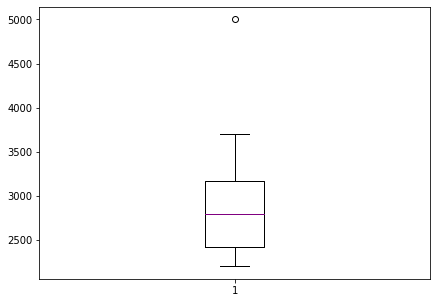

In [52]:
import matplotlib.pyplot as plt  #Required for the plot

gross = [3706,3257,3081,3043,2798,2549,2489,2356,2233,2202,5000] #same data + an outlier: 5000

fig = plt.figure(figsize =(7, 5))
plt.boxplot(gross,medianprops={'linewidth': 1, 'color': 'purple'})

plt.show()

To read more about the 5-number summary, check these out:
- "Find a Five-Number Summary in Statistics: Easy Steps"
, available @ https://www.statisticshowto.com/how-to-find-a-five-number-summary-in-statistics/

- "The Five-Number Summary"
, available @ https://www.purplemath.com/modules/boxwhisk2.htm

- "What Is the 5 Number Summary?"
by __*Courtney Taylor*__, available @ https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-median-mode/

#### <font color=crimson>Variance</font>

The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean. The observations may or may not be meaningful if observations in data sets are highly spread. Let's calculate the variance for budget of the Top10 highest-grossing films.

![](https://miro.medium.com/max/666/0*ovSFlxj9RJMgtQoX.png)

Note that if we are working with the entire population (and not the sample), the denominator should be "n" instead of "n-1".

Note that if we are working with the entire population (and not the sample), the denominator should be "n" instead of "n-1".

In [53]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var1 = sum((item - mean)**2 for item in budget) / (n - 1)
print("The variance of the budget of the Top10 highest-grossing films is ",var1)

# via the Statistics library:
Budget = Movies['Budget_million$']
var2 = statistics.variance(Budget)
print("The variance of the budget of the Top10 highest-grossing films is ",var2)

The variance of the budget of the Top10 highest-grossing films is  20374.70488888889
The variance of the budget of the Top10 highest-grossing films is  20374.70488888889


#### <font color=crimson>Standard Deviation</font>

The sample standard deviation is another measure of data spread. It’s connected to the sample variance, as standard deviation, 𝑠, is the positive square root of the sample variance. The standard deviation is often more convenient than the variance because it has the same unit as the data points.

![](https://cdn.kastatic.org/googleusercontent/N8xzWFc6eo0XBHEXZjz1SwvLSnPezvhTRF1P17kdjUG_tnJivGKkyCxbwVe4MZ0-USOxIZBohgcjdi8e7Z4Hswcqfw)


In [54]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var = sum((item - mean)**2 for item in budget) / (n - 1)
sd1 = var**0.5
print("The standard deviation of the budget of the Top10 highest-grossing films is ",sd1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
sd2 = statistics.stdev(Budget)
print("The standard deviation of the budget of the Top10 highest-grossing films is ",sd2,"million USD")

The standard deviation of the budget of the Top10 highest-grossing films is  142.73999050332353 million USD
The standard deviation of the budget of the Top10 highest-grossing films is  142.73999050332353 million USD


#### <font color=crimson>Skewness</font>

The sample skewness measures the asymmetry of a data sample. There are several mathematical definitions of skewness. The Fisher-Pearson standardized moment coefficient is calculated by using mean, median and standard deviation of the data. 

![](https://miro.medium.com/max/560/1*B-n9Ujb_IPggKO9P52jrDA.png)

Usually, negative skewness values indicate that there’s a dominant tail on the left side. Positive skewness values correspond to a longer or fatter tail on the right side. If the skewness is close to 0 (for example, between −0.5 and 0.5), then the dataset is considered quite symmetrical.

In [55]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var = sum((item - mean)**2 for item in budget) / (n - 1)
std = var**0.5
skew1 = (sum((item - mean)**3 for item in budget)
         * n / ((n - 1) * (n - 2) * std**3))
print("The skewness of the budget of the Top10 highest-grossing films is ",skew1)

# via the scipy.stats library:
Budget = Movies['Budget_million$']
skew2 = scipy.stats.skew(Budget, bias=False)
print("The skewness of the budget of the Top10 highest-grossing films is ",skew2)

# via the Pandas library:
Budget = Movies['Budget_million$']
skew3 = Budget.skew()
print("The skewness of the budget of the Top10 highest-grossing films is ",skew3)

The skewness of the budget of the Top10 highest-grossing films is  0.7636547490528159
The skewness of the budget of the Top10 highest-grossing films is  0.763654749052816
The skewness of the budget of the Top10 highest-grossing films is  0.763654749052816


#### <font color=crimson>Kurtosis</font>

Kurtosis describes the peakedness of the distribution. In other words, Kurtosis identifies whether the tails of a given distribution contain extreme values. While Skewness essentially measures the symmetry of the distribution, kurtosis determines the heaviness of the distribution tails.

![](https://miro.medium.com/max/2220/1*-UQjlHtFyW6m5gcyZ6db2A.png)

If the distribution is tall and thin it is called a leptokurtic distribution. Values in a leptokurtic distribution are near the mean or at the extremes. A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic distribution. A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic distribution. 

In [56]:
# via the scipy.stats library:
Budget = Movies['Budget_million$']
Kurt = scipy.stats.kurtosis(Budget)
print("The kurtosis of the budget of the Top10 highest-grossing films is ",Kurt) #a platykurtic distribution | the tails are heavy

The kurtosis of the budget of the Top10 highest-grossing films is  -1.3110307923262225


## References (for this section)

- "Stuck in the middle – mean vs. median"
, available @ https://www.clinfo.eu/mean-median/

- "Mean vs Median: When to Use Which Measure?"
, available @ https://www.datascienceblog.net/post/basic-statistics/mean_vs_median/

- "Mean vs. Median"
by __*AnswerMiner*__, available @ https://www.answerminer.com/blog/mean-vs-median

To read more about skewness and kurtosis, check these out:
- "Measures of Skewness and Kurtosis"
, available @ https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,relative%20to%20a%20normal%20distribution.

- "Are the Skewness and Kurtosis Useful Statistics?"
, available @ https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics

- "Skew and Kurtosis: 2 Important Statistics terms you need to know in Data Science"
by __*Diva Dugar*__, available @ https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

- "Measures of Shape: Skewness and Kurtosis"
by __*Stan Brown*__, available @ https://brownmath.com/stat/shape.htm

## In-Class Exercises

Using the concrete database already downloaded, explore its contents using summary metrics.  We will start as if we are going to do some kind of complete analysis ...

# Concrete Compressive Strength
The Compressive Strength of Concrete determines the quality of Concrete. 
The strength is determined by a standard crushing test on a concrete cylinder, that requires engineers to build small concrete cylinders with different combinations of raw materials and test these cylinders for strength variations with a change in each raw material. 
The recommended wait time for testing the cylinder is 28 days to ensure correct results, although there are formulas for making estimates from shorter cure times.
The formal 28-day approach consumes a lot of time and labor to prepare different prototypes and test them. 
Also, this method is prone to human error and one small mistake can cause the wait time to drastically increase.

One way of reducing the wait time and reducing the number of combinations to try is to make use of digital simulations, where we can provide information to the computer about what we know and the computer tries different combinations to predict the compressive strength.
This approach can reduce the number of combinations we can try physically and reduce the total amount of time for experimentation. 
But, to design such software we have to know the relations between all the raw materials and how one material affects the strength. 
It is possible to derive mathematical equations and run simulations based on these equations, but we cannot expect the relations to be same in real-world. 
Also, these tests have been performed for many numbers of times now and we have enough real-world data that can be used for predictive modelling.

We are going to analyse a Concrete Compressive Strength dataset and build a Machine Learning Model to predict the compressive strength for given mixture (inputs). 

## Dataset Description

The dataset consists of 1030 instances with 9 attributes and has no missing values. 
There are 8 input variables and 1 output variable. 
Seven input variables represent the amount of raw material (measured in $kg/m^3$) and one represents Age (in Days). 
The target variable is Concrete Compressive Strength measured in (MPa — Mega Pascal). 
We shall explore the data to see how input features are affecting compressive strength.

## Obtain the Database, Perform Initial EDA

1. Get the database from a repository 
2. Import/install support packages (if install required, either on your machine, or contact network admin to do a root install)
3. EDA

> Local (our server copy)
```
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/ce-5319-webroot/1-Databases/ConcreteMixtures/concreteData.csv"  # set the url
response = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('concreteData.csv','wb').write(response.content); # extract from the remote the contents, assign to a local file same name
```

The script below gets the file from the actual remote repository

In [38]:
#Get database -- use the Get Data From URL Script
#Step 1: import needed modules to interact with the internet
import requests
#Step 2: make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls' # an Excel file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('concreteData.xls', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection

Import/install support packages (if install required, either on your machine, or contact network admin to do a root install)

In [47]:
# The usual suspects plus some newish ones!
### Import/install support packages
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn 
#%matplotlib inline

Now try to read the file, use pandas methods

In [39]:
data = pandas.read_excel("concreteData.xls")

Now lets examine the file, first the length the `head` method

In [40]:
print("How many rows :",len(data))

How many rows : 1030


A quick look at the sturcture of the data object

In [44]:
data.tail() # head is a pandas method that becomes accessible when the dataframe is created with the read above

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


Rename the columns to simpler names, notice use of a set constructor.
Once renamed, again look at the first few rows

In [45]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Exploratory Data Analysis

The first step in a Data Science project is to understand the data and gain insights from the data before doing any modelling. This includes checking for any missing values, plotting the features with respect to the target variable, observing the distributions of all the features and so on. Let us import the data and start analysing.

First we check for null values, as the database grows, one can expect null values, so check for presence. 
We wont act in this case, but concievably would in future iterations.

In [67]:
data.isna().sum() # isna() and sum() are pandas methods that become accessible when the dataframe is created with the read above

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

Lets explore the database a little bit

In [68]:
data.describe() # describe is a pandas method that becomes accessible when the dataframe is created with the read above

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Association Measures (Covariance and Correlation)

**Covariance:**
is a measure of the joint variability of two random variables.  The formula to compute covariance is:

$$cov(x,y)=\frac{\sum_{i=1}^{n}(x-\bar x)(y-\bar y)}{n-1}$$

If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive. 
In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative. 
The sign of the covariance therefore shows the tendency of any linear relationship between the variables. 
The magnitude of the covariance is not particularly useful to interpret because it depends on the magnitudes of the variables. 

<!--![](https://www.wallstreetmojo.com/wp-content/uploads/2019/03/Covariance-Formula.jpg) <br>-->

A normalized version of the covariance, the correlation coefficient, however, is useful in terms of sign and magnitude.

<!--![](https://media.geeksforgeeks.org/wp-content/uploads/Correl.png) <br>-->

<img src="https://media.geeksforgeeks.org/wp-content/uploads/Correl.png" width="500">
    
**Correlation Coefficient:** is a measure how strong a relationship is between two variables. There are several types of correlation coefficients, but the most popular is Pearson’s. Pearson’s correlation (also called Pearson’s R) is a correlation coefficient commonly used in linear regression. Correlation coefficient formulas are used to find how strong a relationship is between data. The formula for Pearson’s R is:

$$r=\frac{n(\sum xy)-(\sum x)(\sum y)}{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}$$

<!--![](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson.gif) <br>-->
    
The correlation coefficient returns a value between -1 and 1, where:

<img src="https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png" width="500"> <br>

- 1 : A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other. For example, shoe sizes go up in (almost) perfect correlation with foot length.
- -1: A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other. For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed.
- 0 : Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related.

---

Now lets examine our dataframe.

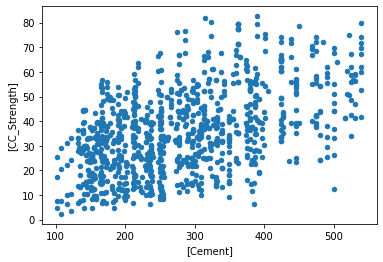

In [49]:
data.plot.scatter(x=['Cement'],y=['CC_Strength']); # some plotting methods come with pandas dataframes

<AxesSubplot:xlabel='[CoarseAggregate]', ylabel='[CC_Strength]'>

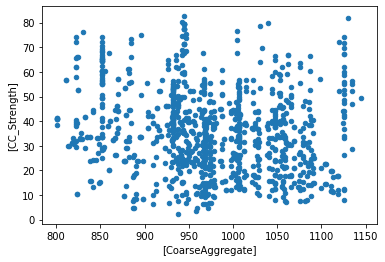

In [50]:
data.plot.scatter(x=['CoarseAggregate'],y=['CC_Strength']) # some plotting methods come with pandas dataframes

<AxesSubplot:xlabel='[Water]', ylabel='[CC_Strength]'>

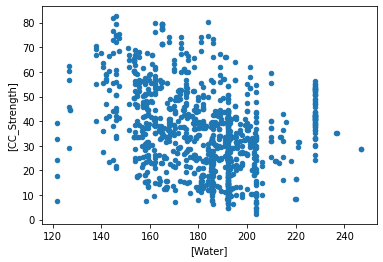

In [51]:
data.plot.scatter(x=['Water'],y=['CC_Strength']) # some plotting methods come with pandas dataframes

In [52]:
data.corr() # corr (Pearson's correlation coefficient) is a pandas method that becomes accessible when the dataframe is created with the read above

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
BlastFurnaceSlag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
FlyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
CoarseAggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
FineAggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
CC_Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


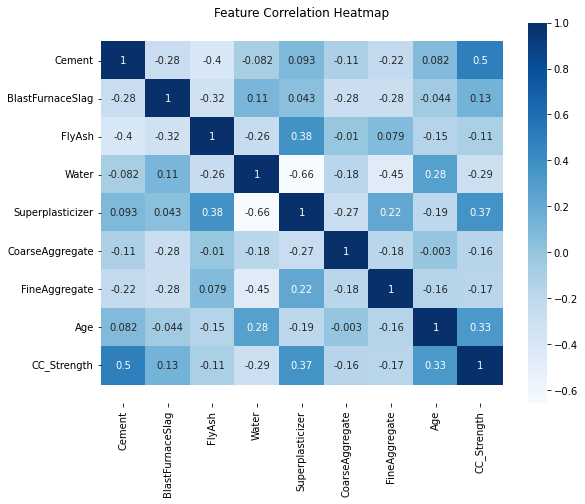

In [53]:
corr = data.corr()
plt.figure(figsize=(9,7))
seaborn.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Initial Observations

The high correlations (> 0.3) between Compressive strength and other features are for Cement, Age and Super plasticizer.  Notice water has a negative correlation which is well known and the reason for dry mixtures in high performance concrete. Super Plasticizer has a negative high correlation with Water (also well known, SP is used to replace water in the blends and provide necessary workability), positive correlations with Fly ash and Fine aggregate.

We can further analyze these correlations visually by plotting these relations.

/opt/jupyterhub/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


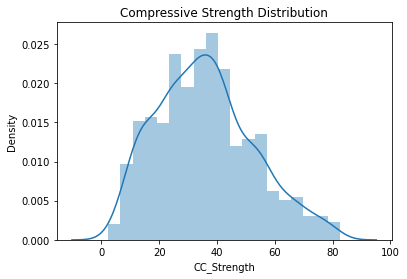

In [35]:
ax = seaborn.distplot(data.CC_Strength);
ax.set_title("Compressive Strength Distribution");

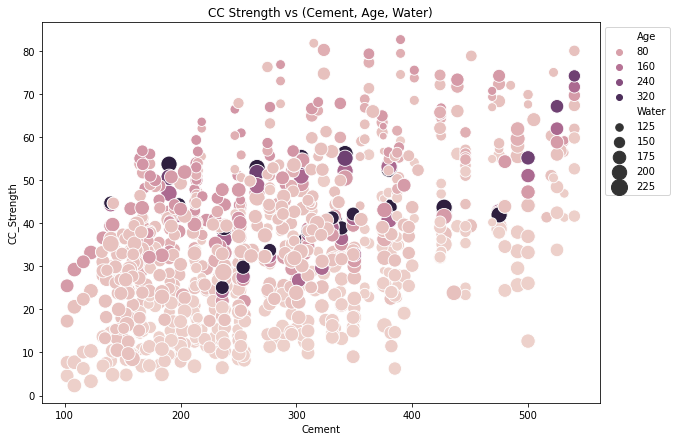

In [37]:
fig, ax = plt.subplots(figsize=(10,7))
seaborn.scatterplot(y="CC_Strength", x="Cement", hue="Age", size="Age", data=data, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()